# Animasi Buffon's Needle Problem

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML
import math

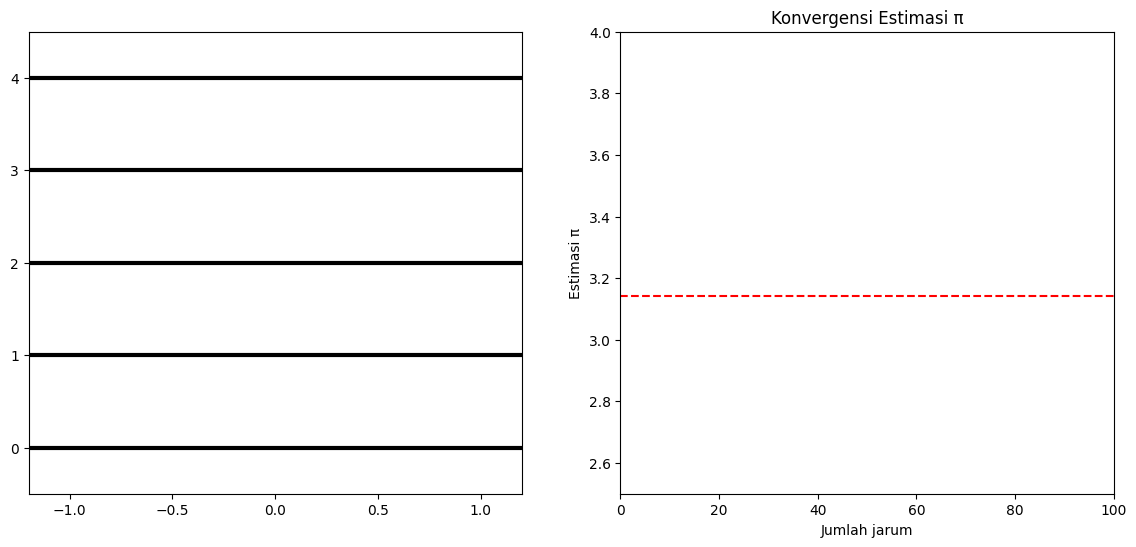

In [8]:
# Parameter simulasi
L = 0.8          # panjang jarum
d = 1.0          # jarak antar garis
num_lines = 5    # jumlah garis horizontal
N = 100          # jumlah jarum / frame

# Generate posisi & sudut jarum
y_centers = np.random.uniform(0, d * (num_lines - 1), N)
thetas = np.random.uniform(0, math.pi, N)
x_centers = np.random.uniform(-1.0, 1.0, N)

# Setup figure dengan 2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# LEFT PANEL: Buffon's Needle
ax1.set_xlim(-1.2, 1.2)
ax1.set_ylim(-0.5, d * (num_lines - 1) + 0.5)
#ax1.set_aspect('equal')

# gambar 5 garis horizontal
y_lines = [i * d for i in range(num_lines)]
for y in y_lines:
    ax1.hlines(y, -1.2, 1.2, linewidth=3, color='black')

all_lines = []

# RIGHT PANEL: π convergence
ax2.set_xlim(0, N)
ax2.set_ylim(2.5, 4.0)
ax2.set_xlabel("Jumlah jarum")
ax2.set_ylabel("Estimasi π")
ax2.set_title("Konvergensi Estimasi π")

# garis horizontal nilai π sebenarnya
ax2.axhline(math.pi, color='red', linestyle='--', label='π (sebenarnya)')
pi_points_x = []
pi_points_y = []
conv_plot, = ax2.plot([], [], 'bo-', markersize=4)

# Statistik
cross_count = 0
total_count = 0


def needle_crosses_line(y0, y1, d):
    """Cek apakah jarum memotong salah satu dari garis horizontal."""
    for yl in y_lines:
        if (y0 <= yl and y1 >= yl) or (y1 <= yl and y0 >= yl):
            return True
    return False

def update(frame):
    global cross_count, total_count, pi_points_x, pi_points_y

    x_c = x_centers[frame]
    y_c = y_centers[frame]
    theta = thetas[frame]

    dx = (L / 2) * math.cos(theta)
    dy = (L / 2) * math.sin(theta)

    x0, y0 = x_c - dx, y_c - dy
    x1, y1 = x_c + dx, y_c + dy

    # gambar jarum
    ln, = ax1.plot([x0, x1], [y0, y1], linewidth=2)
    all_lines.append(ln)

    total_count += 1

    # cek apakah jarum memotong salah satu dari 5 garis horizontal
    crosses = needle_crosses_line(y0, y1, d)

    if crosses:
        cross_count += 1
        ln.set_color("red")
    else:
        ln.set_color("blue")

    # Estimasi π (Buffon)
    if cross_count > 0:
        p_hat = cross_count / total_count
        pi_hat = 2 * L / (d * p_hat)
    else:
        pi_hat = np.nan

    # update grafik konvergensi
    pi_points_x.append(total_count)
    pi_points_y.append(pi_hat)

    conv_plot.set_data(pi_points_x, pi_points_y)
    ax2.set_xlim(0, N)

    ax1.set_title(
        f"Buffon's Needle Problem\n"
        f"Frame {frame+1}/{N} | Crosses: {cross_count} | Total: {total_count}\n"
        f"Estimasi π: {pi_hat:.5f}" if cross_count > 0 else "Mengumpulkan data..."
    )

    return all_lines, conv_plot

In [9]:
# Buat animasi
matplotlib.rcParams['animation.embed_limit'] = 2**128
ani = animation.FuncAnimation(fig, update, frames=N, interval=250, blit=False)

# Tampilkan animasi / simpan animasi (pilih salah satu)
# HTML(ani.to_jshtml())
ani.save("buffon_needles_problem.gif", writer="pillow", fps=5)

# Simulasi Buffon's Needle untuk Mengestimai Nilai π

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, cos, sin

In [3]:
# Simulasi Buffon's Needle
# L = panjang jarum
# D = jarak antar garis paralel
# N = jumlah percobaan
def buffon(L, D, N):
    hit = 0

    for _ in range(N):
        # theta di [0, π/2] karena simetri
        theta = pi * random.random() / 2
        
        # kondisi menabrak garis: D * random.random() <= L * cos(theta) atau  (L/2) * math.sin(theta) >=  (D/2) * random.random()
        if D * random.random() <= L * cos(theta) :
            hit += 1

    return hit / N    # probabilitas hit


# Estimasi π menggunakan Buffon’s Needle
# π ≈ 2L / (D * P_hit)
def estimate_pi(N):
    L = 0.8
    D = 1.0
    p_hit = buffon(L, D, N)
    pi_est = 2 * L / (D * p_hit)
    return pi_est


# Plot konvergensi estimasi π
x_values = np.arange(10000, 1100000, 50000)
n = len(x_values)
pi_estimates = np.zeros(n)

for i in range(n):
    pi_estimates[i] = estimate_pi(x_values[i])

Rata-rata estimasi π: 3.1395578665963835
π eksak             : 3.141592653589793


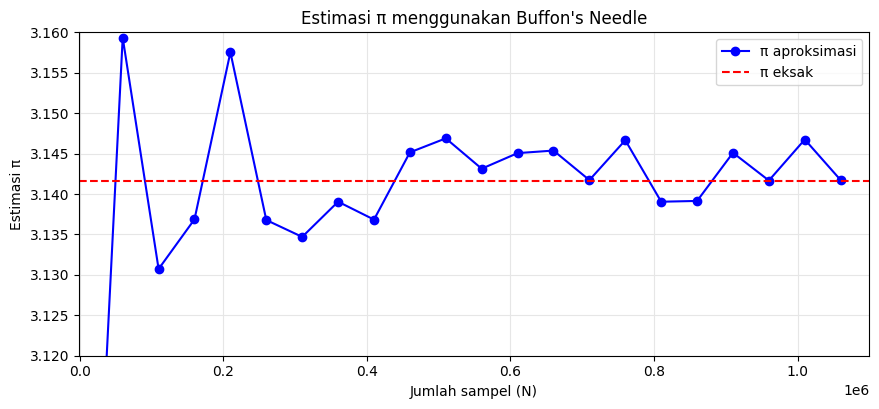

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10.2, 4.2))
ax.plot(x_values, pi_estimates, label='π aproksimasi', marker='o', color='blue')
ax.axhline(pi, linestyle='--', label='π eksak', color='red')
ax.set(xlabel="Jumlah sampel (N)")
ax.set(ylabel="Estimasi π")
ax.set(title="Estimasi π menggunakan Buffon's Needle")
ax.legend()
ax.grid(axis='both', color='0.9')
ax.axis((-1000,1100000,3.12,3.16))

# Cetak rata-rata estimasi
print("Rata-rata estimasi π:", np.mean(pi_estimates))
print("π eksak             :", pi)
plt.savefig('Estimasi_pi_menggunakan_Buffons_Needle.png', dpi=300)